# Explore here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
main_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [4]:
main_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
main_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
main_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='age', ylabel='Count'>

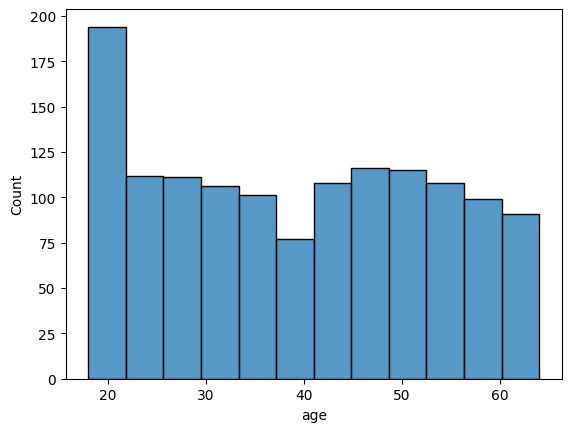

In [8]:
sns.histplot(x=main_df['age'])

<Axes: xlabel='count', ylabel='sex'>

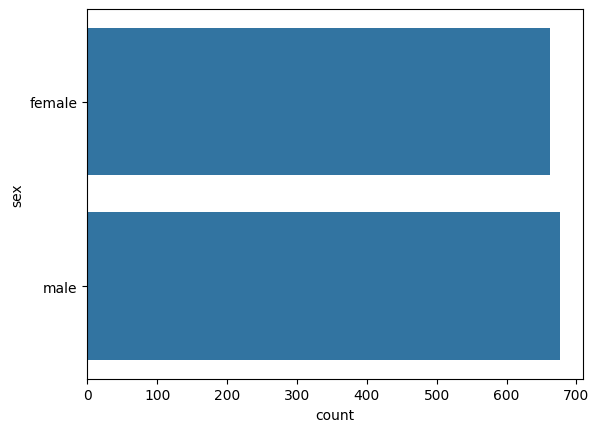

In [9]:
sns.countplot(main_df['sex'])

<Axes: xlabel='bmi', ylabel='Count'>

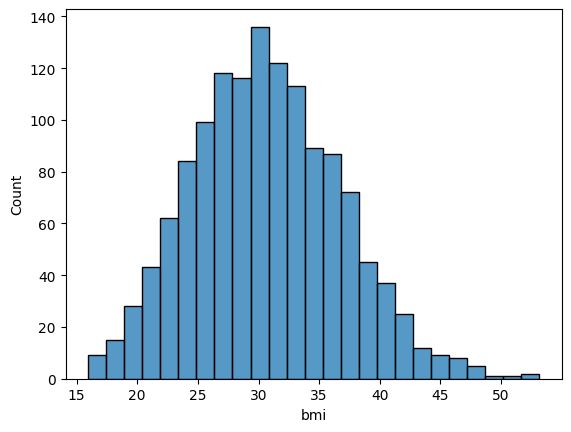

In [10]:
sns.histplot(x=main_df['bmi'])

<Axes: xlabel='bmi'>

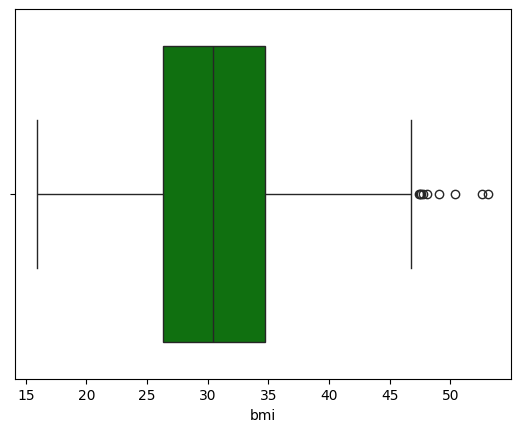

In [11]:
sns.boxplot(x=main_df['bmi'], color='green')

<Axes: xlabel='smoker', ylabel='Count'>

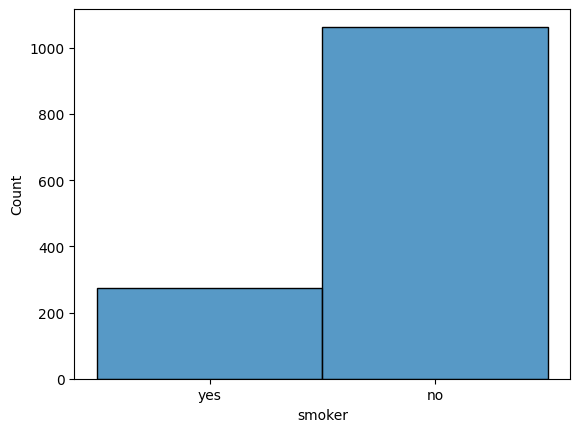

In [12]:
sns.histplot(x=main_df['smoker'])

In [13]:
main_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


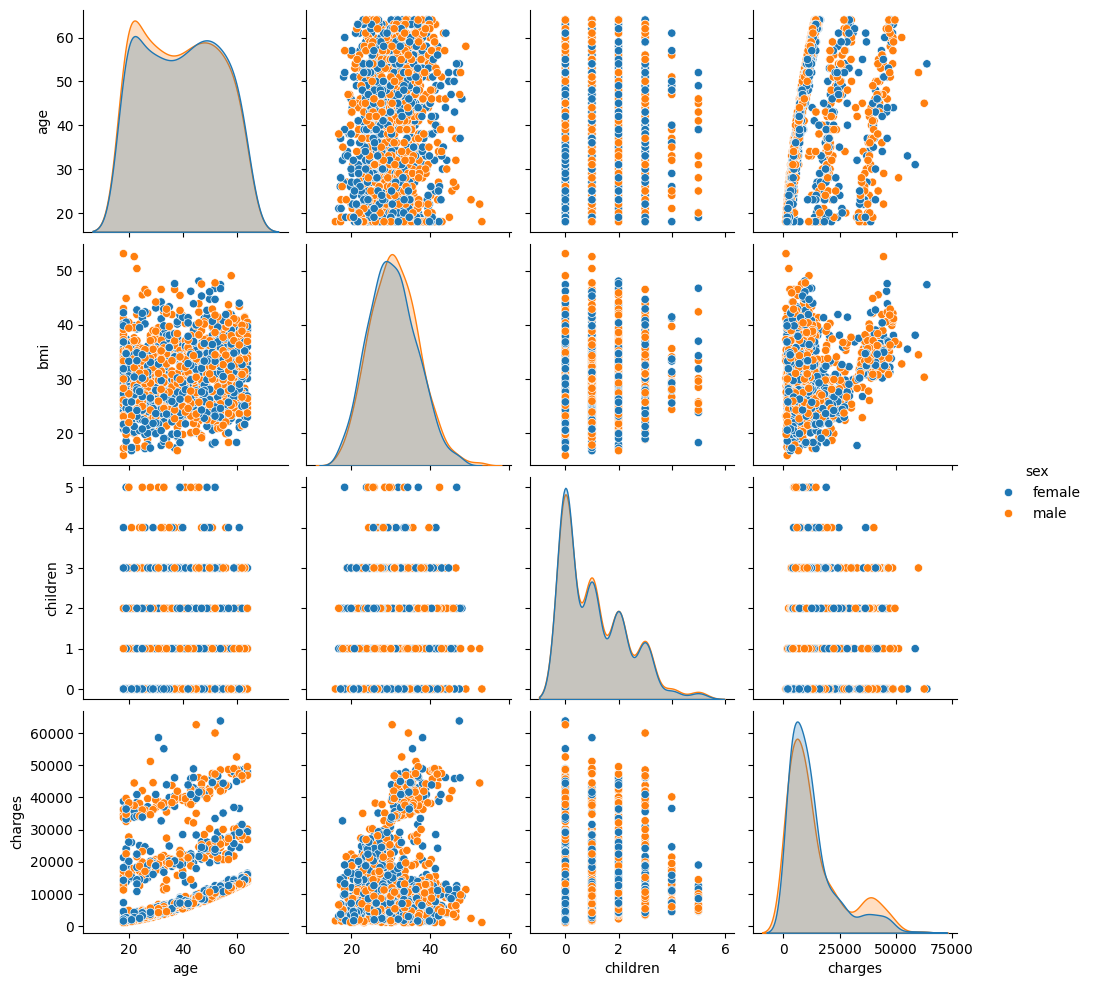

In [14]:
sns.pairplot(main_df, hue='sex')

In [15]:
X = main_df.drop(columns=['charges'])

y = main_df['charges']

In [16]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [20]:
X_dummies = pd.get_dummies(X, dtype='int', drop_first=True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=4)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
train_preds = linreg.predict(X_train)
test_preds = linreg.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
train_squared_error = np.sqrt(mean_squared_error(y_true= y_train, y_pred= train_preds))
test_squared_error = np.sqrt(mean_squared_error(y_test, test_preds))

In [36]:
print(f"My training error is: {train_squared_error}")
print(f"My testing error is: {test_squared_error}")

My training error is: 5903.076568164221
My testing error is: 6397.270624570063


<Axes: xlabel='charges'>

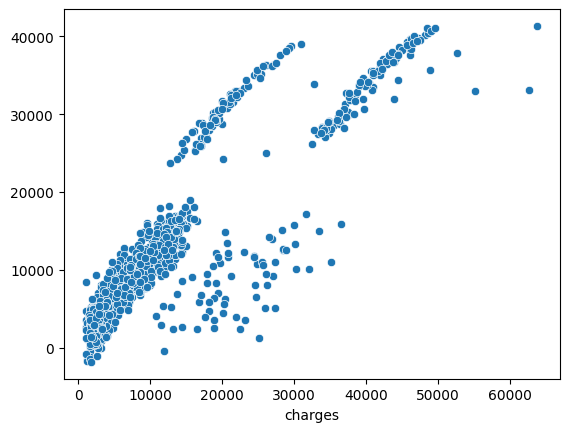

In [38]:
sns.scatterplot(x=y_train, y=train_preds)